In [130]:
# Importing Libraries
import pydot
import re
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
from datetime import datetime
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
#from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from gensim.utils import simple_preprocess
#from gensim.parsing.preprocessing import STOPWORDS
#from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#from gensim import corpora, models, similarities
#from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [131]:
#Shared Articles Dataset
articlesDF = pd.read_csv(r'C:\\Users\\cskar\\OneDrive\\Documents\\GitHub\\MachineLearningWithPython\\shared_articles.csv')
#User Interactions Dataset
interactionsDF = pd.read_csv(r'C:\\Users\\cskar\\OneDrive\\Documents\\GitHub\\\MachineLearningWithPython\\users_interactions.csv')

In [132]:
articlesDF.dtypes

timestamp           int64
eventType          object
contentId           int64
authorPersonId      int64
authorSessionId     int64
authorUserAgent    object
authorRegion       object
authorCountry      object
contentType        object
url                object
title              object
text               object
lang               object
dtype: object

In [133]:
interactionsDF.dtypes

timestamp       int64
eventType      object
contentId       int64
personId        int64
sessionId       int64
userAgent      object
userRegion     object
userCountry    object
dtype: object

In [134]:
articlesDF.contentId = articlesDF.contentId.astype(str)
articlesDF.authorPersonId = articlesDF.authorPersonId.astype(str)
articlesDF.authorSessionId = articlesDF.authorSessionId.astype(str)
articlesDF.shape

(3122, 13)

In [135]:
interactionsDF.contentId = interactionsDF.contentId.astype(str)
interactionsDF.personId = interactionsDF.personId.astype(str)
interactionsDF.sessionId = interactionsDF.sessionId.astype(str)
interactionsDF.shape

(72312, 8)

In [136]:
# CONTENT REMOVED JUST HAS 75 ENTRIES AND IS CONTENT THAT IS NO LONGER ACCESSIBLE WISE TO DELETE
deletedContentID =articlesDF.contentId[articlesDF.eventType == 'CONTENT REMOVED']
articlesDF = articlesDF[articlesDF.eventType == 'CONTENT SHARED']
articlesDF.drop('eventType', axis=1, inplace=True)
interactionsDF = interactionsDF[~interactionsDF.contentId.isin(deletedContentID)]

In [137]:
#before joining rename similar name columns
articlesDF.rename(inplace = True, columns={"timestamp":"articlePublishedTime"})
interactionsDF.rename(inplace=True, columns={"timestamp": "articleInteractedTime"})

In [138]:
pie_chart = go.Figure()
aLabels = articlesDF['contentType'].value_counts().index
aValues = articlesDF['contentType'].value_counts().values
pie_chart.add_trace(go.Pie(labels=aLabels,values=aValues))
pie_chart.update_traces(textposition='outside', textinfo='percent+label',\
                               marker=dict(colors=['darkorange','gold','red'], line=dict(color='#000000', width=2)))
pie_chart.update_layout(height=500, width=800, title_text="Distributed Type of Content")
pie_chart.show()

In [139]:
#Delete contents which are not of HTML type and make sure we have the interactions only for those contents which are present
deletedContentID =articlesDF.contentId[articlesDF.contentType != 'HTML']
articlesDF = articlesDF[articlesDF.contentType == 'HTML']
articlesDF.drop('contentType', axis=1, inplace=True)
interactionsDF = interactionsDF[~interactionsDF.contentId.isin(deletedContentID)]

In [140]:
langPie = go.Figure()
aLabels = articlesDF['lang'].value_counts().index
aValues = articlesDF['lang'].value_counts().values
langPie.add_trace(go.Pie(labels=aLabels, values=aValues))
langPie.update_traces(textposition='outside', textinfo='percent+label',\
                               marker=dict(colors=['darkorange','gold','red','yellow','green'], line=dict(color='#000000', width=2)))
langPie.update_layout(height=500, width=800, title_text="Languages of the Distrtibuted Content")
langPie.show()

In [143]:
#Create a new column 'authorUserAgentNew' to categorize values for the column 'authorUserAgent' and fill in the missing values
userAgentValues = pd.Series(["Android", "Windows","Linux","Mac","iOS", "NA", "CrOS"], dtype = "category")
articlesDF['authorUserAgent'].fillna("NA",inplace=True)
articlesDF['authorUserAgentNew'] = userAgentValues
for iX, val in userAgentValues.iteritems():
    articlesDF.loc[articlesDF.authorUserAgent.str.contains(val, na=False), 'authorUserAgentNew'] = val
#articlesDF['authorUserAgentNew'].value_counts()
#articlesDF['authorUserAgentNew'].value_counts().sum()
barAuthorAgents = go.Figure()
barAuthorAgents.add_trace(go.Bar(x=articlesDF['authorUserAgentNew'].value_counts().values,y=articlesDF['authorUserAgentNew'].value_counts().index, orientation='h'))
barAuthorAgents.update_layout(height=500, width=800, title_text="Distribution of the Devices used by the Authors")
barAuthorAgents.update_yaxes(categoryorder = 'total ascending')
barAuthorAgents.show()

In [144]:
#Create a new column 'UserAgentNew' to categorize values for the column 'userAgent' and fill in the missing values
interactionsDF['userAgentNew'] = userAgentValues
interactionsDF['userAgent'].fillna("NA",inplace=True)
for iX,val in userAgentValues.iteritems():
    interactionsDF.loc[interactionsDF.userAgent.str.contains(val, na=False), 'userAgentNew'] = val



barUserAgents = go.Figure()
barUserAgents.add_trace(go.Bar(x=interactionsDF['userAgentNew'].value_counts().values,y=interactionsDF['userAgentNew'].value_counts().index,orientation='h'))
barUserAgents.update_layout(height=500, width=800, title_text="Distribution of the Devices used by the Users")
barUserAgents.update_yaxes(categoryorder = 'total ascending')
barUserAgents.show()

#interactionsDF['userAgentNew'].value_counts()
#interactionsDF['authorUserAgentNew'].value_counts().sum()

In [145]:
barInteractionType = go.Figure()
barInteractionType.add_trace(go.Bar(x=interactionsDF['eventType'].value_counts().index,y=interactionsDF['eventType'].value_counts().values))
barInteractionType.update_layout(height=500, width=800, title_text="Interaction type of the Users")
barInteractionType.update_xaxes(categoryorder = 'total descending')
barInteractionType.show()

In [146]:
articlesDF.drop('authorUserAgent', axis=1, inplace=True)
interactionsDF.drop('userAgent', axis=1, inplace=True)
articlesDF.rename(inplace = True, columns={"authorUserAgentNew":"authorUserAgent"})
interactionsDF.rename(inplace = True, columns={"userAgentNew":"userAgent"})

In [147]:
articlesDF.isnull().sum()

articlePublishedTime       0
contentId                  0
authorPersonId             0
authorSessionId            0
authorRegion            2360
authorCountry           2360
url                        0
title                      0
text                       0
lang                       0
authorUserAgent            0
dtype: int64

In [148]:
interactionsDF.isnull().sum()

articleInteractedTime        0
eventType                    0
contentId                    0
personId                     0
sessionId                    0
userRegion               15231
userCountry              15220
userAgent                    0
dtype: int64

In [162]:
country_code_dict = {
    'BR': ('BRA', 'Brazil'),
    'US': ('USA', 'United States'),
    'KR': ('KOR', 'South Korea'),
    'CA': ('CAN', 'Canada'),
    'JP': ('JPN', 'Japan'),
    'AU': ('AUS', 'Australia'),
    'GB': ('GBR', 'United Kingdom'),
    'DE': ('DEU', 'Germany'),
    'DE': ('DEU', 'Germany'),
    'IE': ('IRL', 'Ireland'),
    'IS': ('ISL', 'Iceland'),
    'SG': ('SGP', 'Singapore'),
    'AR': ('ARG', 'Argentina'),
    'PT': ('PRT', 'Portugal'),
    'IN': ('IND', 'India'),
    'ES': ('ESP', 'Spain'),
    'IT': ('ITA', 'Italy'),
    'MY': ('MYS', 'Malaysia'),
    'CO': ('COL', 'Colombia'),
    'CN': ('CHN', 'China'),
    'CL': ('CHL', 'Chile'),
    'NL': ('NLD', 'Netherlands')
}
interactionsFromCountryDF = pd.DataFrame(interactionsDF['userCountry'])
interactionsFromCountryDF['countryCode'] = interactionsDF['userCountry'].apply(lambda x: country_code_dict[x][0] if x in country_code_dict else None)
interactionsFromCountryDF['countryName'] = interactionsDF['userCountry'].apply(lambda x: country_code_dict[x][1] if x in country_code_dict else None)
interactionsFromCountryDF

,userCountry,countryCode,countryName
0,NaN,None,None
1,US,USA,United States
2,NaN,None,None
3,NaN,None,None
4,NaN,None,None
...,...,...,...
72307,BR,BRA,Brazil
72308,BR,BRA,Brazil
72309,BR,BRA,Brazil
72310,BR,BRA,Brazil


In [163]:
interactions_by_country_df = pd.DataFrame(interactionsFromCountryDF.groupby('countryName').size().sort_values(ascending=False).reset_index())
interactions_by_country_df.columns = ['countryName', 'No. of Interactions']
interactions_by_country_df

,countryName,No. of Interactions
0,Brazil,50900
1,United States,4601
2,South Korea,239
3,Canada,217
4,Japan,142
5,Australia,137
6,United Kingdom,22
7,Germany,19
8,Ireland,14
9,Iceland,12


In [165]:
fig = go.Figure(data=go.Choropleth(
    locations=interactions_by_country_df['countryName'], # Spatial coordinates
    z = interactions_by_country_df['No. of Interactions'], 
    locationmode = 'country names', 
    autocolorscale=True,
    colorbar_title = "No. of Interactions",
))

fig.update_layout(
    title_text = 'Interactions by Country', 
    geo_scope='world', 
)

fig.show()

In [149]:
# Merge 'interactionsDF' with 'articlesDF'and drop duplicate tuples
interactionswitharticlesDF = pd.merge(interactionsDF, articlesDF, how='inner', on='contentId')
interactionswitharticlesDF.drop_duplicates()

,articleInteractedTime,eventType,contentId,personId,sessionId,userRegion,userCountry,userAgent,articlePublishedTime,authorPersonId,authorSessionId,authorRegion,authorCountry,url,title,text,lang,authorUserAgent
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NA,1465309434,-1032019229384696495,-7696592431575292648,NaN,NaN,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en,NA
1,1465413046,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,SP,BR,Mac,1465309434,-1032019229384696495,-7696592431575292648,NaN,NaN,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en,NA
2,1465907360,VIEW,-3499919498720038879,-108842214936804958,-2163423831651021975,SP,BR,Windows,1465309434,-1032019229384696495,-7696592431575292648,NaN,NaN,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en,NA
3,1465583412,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,SP,BR,Linux,1465309434,-1032019229384696495,-7696592431575292648,NaN,NaN,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en,NA
4,1465582468,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,SP,BR,Linux,1465309434,-1032019229384696495,-7696592431575292648,NaN,NaN,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71568,1482929120,VIEW,-7108012586837980940,-4028919343899978105,1103146045123415934,SP,BR,Windows,1482929117,-4028919343899978105,1103146045123415934,SP,BR,https://www.smashingmagazine.com/2016/12/digit...,The Ultimate Digital Clean-Up Checklist: Are Y...,With a couple of days left until New Year's Ev...,en,Windows
71569,1483616272,VIEW,7526977287801930517,-3643155458357242906,8781579964260038140,MG,BR,Mac,1483616270,-3643155458357242906,8781579964260038140,MG,BR,https://blog.medium.com/renewing-mediums-focus...,Renewing Medium's focus,We've decided to make some major changes at Me...,en,Mac
71570,1485429106,VIEW,-282629989972409543,5660542693104786364,-537882753893230818,SP,BR,Windows,1485429102,5660542693104786364,-537882753893230818,SP,BR,http://www.valor.com.br/financas/4847178/santa...,Santander Brasil gera 21% do resultado da matr...,SÃO PAULO - As operações do Santander no Brasi...,pt,Windows
71571,1485429066,VIEW,-6468782714472551646,5660542693104786364,-537882753893230818,SP,BR,Windows,1485429024,5660542693104786364,-537882753893230818,SP,BR,http://www.valor.com.br/financas/4848194/santa...,"Santander Brasil tem lucro gerencial de R$ 1,9...",SÃO PAULO - O Santander Brasil obteve lucro lí...,pt,Windows


In [166]:
articlesDF["viewCount"]= 0
articlesDF["likeCount"]=0
articlesDF["commentcreatedCount"]=0
articlesDF["bookmarkCount"]=0
articlesDF["followCount"]=0
articlesDF["interactionCount"]=0

for iX,val in articlesDF.iterrows():
    articlesDF.loc[iX,"viewCount"]=interactionsDF[(interactionsDF.contentId==val.contentId) 
                                                  & (interactionsDF.eventType=="VIEW")].shape[0]
    articlesDF.loc[iX,"followCount"]=interactionsDF[(interactionsDF.contentId==val.contentId) 
                                                    & (interactionsDF.eventType=="FOLLOW")].shape[0]
    articlesDF.loc[iX,"commentcreatedCount"]=interactionsDF[(interactionsDF.contentId==val.contentId) 
                                                            & (interactionsDF.eventType=="COMMENT CREATED")].shape[0]
    articlesDF.loc[iX,"likeCount"]=interactionsDF[(interactionsDF.contentId==val.contentId) 
                                                  & (interactionsDF.eventType=="LIKE")].shape[0]
    articlesDF.loc[iX,"bookmarkCount"]=interactionsDF[(interactionsDF.contentId==val.contentId) 
                                                      & (interactionsDF.eventType=="BOOKMARK")].shape[0]
    articlesDF.loc[iX,"interactionCount"]= interactionsDF[(interactionsDF.contentId==val.contentId)].shape[0]

In [167]:
articlesDF.describe()

,viewCount,likeCount,commentcreatedCount,bookmarkCount,followCount,interactionCount
count,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000
mean,19.959696,1.888999,0.526264,0.809052,0.460852,23.644863
std,27.129692,3.354211,1.279595,2.217639,1.069327,32.379479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,11.000000,1.000000,0.000000,0.000000,0.000000,14.000000
75%,25.000000,2.000000,0.000000,1.000000,0.500000,30.000000
max,355.000000,53.000000,13.000000,78.000000,14.000000,433.000000


In [152]:
numericalColumnNames=["articlePublishedTime", "viewCount","likeCount","commentcreatedCount", "bookmarkCount", "followCount", "interactionCount"]
corrMatrix=articlesDF.corr()
fig = go.Figure(go.Heatmap(x=numericalColumnNames,y=numericalColumnNames,z= corrMatrix,colorscale='YlorRd'))
fig.update_layout(title='Corelation Among Interactions', \
                  width=100 * len(numericalColumnNames), \
                  height=100 * len(numericalColumnNames))
fig.show()

In [153]:
print('Distinct Articles: \t%d' % len(interactionswitharticlesDF['contentId'].unique()))
print('Distinct Users: \t%d' % len(interactionswitharticlesDF['personId'].unique()))
print('Distinct User sessions: \t%d' % len(interactionswitharticlesDF['sessionId'].unique()))

#The summary shows that 50% of the users have interacted with atleast 9 articles 
interactionswitharticlesDF.groupby('personId')['contentId'].size().describe()

Distinct Articles: 	2898
Distinct Users: 	1892
Distinct User sessions: 	28542


count    1892.000000
mean       37.829281
std       102.945422
min         1.000000
25%         3.000000
50%         9.000000
75%        31.000000
max      1851.000000
Name: contentId, dtype: float64

In [154]:
interactionswitharticlesDF.drop(columns=['userCountry', 'userRegion', 'userAgent', 'authorRegion', 'authorCountry', 'authorUserAgent'], axis=1, inplace=True)

interactionswitharticlesDF.isnull().sum() 

articleInteractedTime    0
eventType                0
contentId                0
personId                 0
sessionId                0
articlePublishedTime     0
authorPersonId           0
authorSessionId          0
url                      0
title                    0
text                     0
lang                     0
dtype: int64

In [155]:
def to_datetime(ts):
    return datetime.fromtimestamp(ts)

def to_datetime_str(ts):
    return to_datetime(ts).strftime('%Y-%m-%d %H:%M:%S')

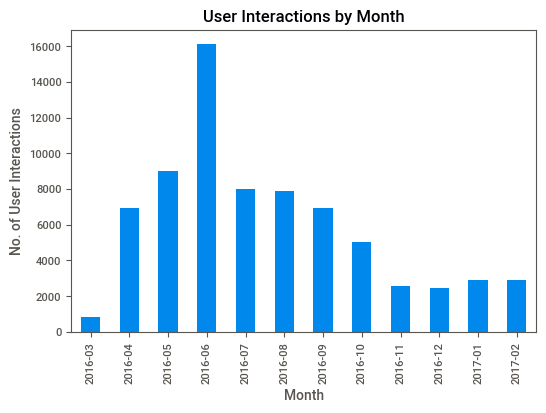

In [157]:
interactionswitharticlesDF['articleInteractedTime'] = interactionswitharticlesDF['articleInteractedTime'].apply(lambda x: to_datetime(x))
interactionswitharticlesDF['month_x'] = interactionswitharticlesDF['articleInteractedTime'].apply(lambda x: '{0}-{1:02}'.format(x.year, x.month))
interactionswitharticlesDF.groupby('month_x').size().plot(kind='bar', title='User Interactions by Month', xlabel='Month', ylabel='No. of User Interactions')
interactionswitharticlesDF.drop('month_x', axis=1, inplace=True)

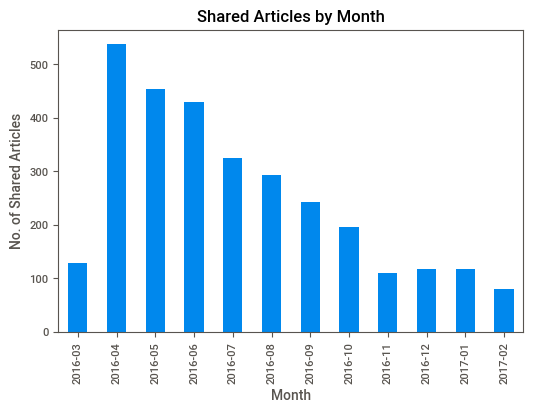

In [158]:
articlesDF['articlePublishedTime'] = articlesDF['articlePublishedTime'].apply(lambda y: to_datetime(y))
interactionswitharticlesDF['articlePublishedTime'] = interactionswitharticlesDF['articlePublishedTime'].apply(lambda y: to_datetime(y))
articlesDF['month_y'] = articlesDF['articlePublishedTime'].apply(lambda y: '{0}-{1:02}'.format(y.year, y.month))
articlesDF.groupby('month_y').size().plot(kind='bar', title='Shared Articles by Month', xlabel='Month', ylabel='No. of Shared Articles')
articlesDF.drop('month_y', axis=1, inplace=True)

In [168]:
urlDomainsDF = pd.DataFrame(interactionswitharticlesDF['url'])
urlDomainsDF['urlDomain'] = interactionswitharticlesDF['url'].apply(lambda x: re.sub(r'^http[s]*:\/\/', '', re.search(r'^http[s]*:\/\/[\w\.]*', x, re.IGNORECASE).group(0)))
urlDomainsDF[['urlDomain','url']]

,urlDomain,url
0,techcrunch.com,http://techcrunch.com/2016/06/07/hiri/
1,techcrunch.com,http://techcrunch.com/2016/06/07/hiri/
2,techcrunch.com,http://techcrunch.com/2016/06/07/hiri/
3,techcrunch.com,http://techcrunch.com/2016/06/07/hiri/
4,techcrunch.com,http://techcrunch.com/2016/06/07/hiri/
...,...,...
71568,www.smashingmagazine.com,https://www.smashingmagazine.com/2016/12/digit...
71569,blog.medium.com,https://blog.medium.com/renewing-mediums-focus...
71570,www.valor.com.br,http://www.valor.com.br/financas/4847178/santa...
71571,www.valor.com.br,http://www.valor.com.br/financas/4848194/santa...


<AxesSubplot:title={'center':'Main Domains on User Shared Articles'}, ylabel='urlDomain'>

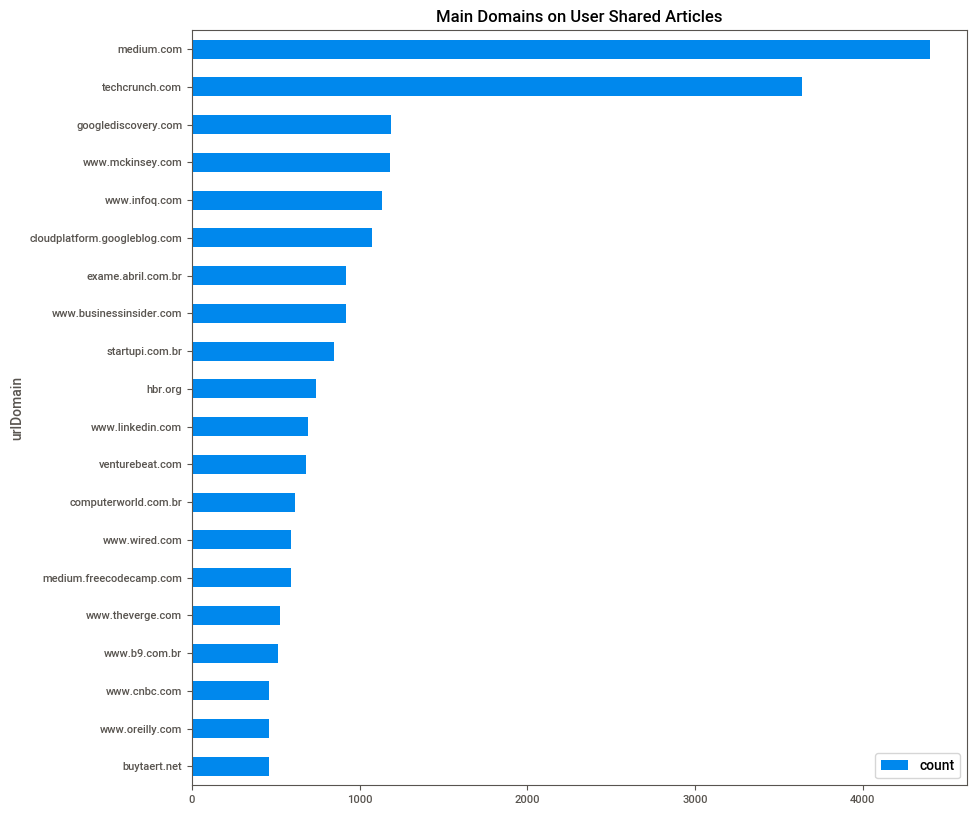

In [169]:
main_domains_df = pd.DataFrame(urlDomainsDF.groupby('urlDomain').size().sort_values(ascending=True))[-20:].reset_index()
main_domains_df.columns = ['urlDomain','count']
main_domains_df['count']
main_domains_df.plot(kind='barh', x='urlDomain', y='count', figsize=(10,10), title='Main Domains on User Shared Articles')


In [170]:
interactionswitharticlesDF

,articleInteractedTime,eventType,contentId,personId,sessionId,articlePublishedTime,authorPersonId,authorSessionId,url,title,text,lang
0,2016-06-08 16:10:32,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-07 11:23:54,-1032019229384696495,-7696592431575292648,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
1,2016-06-08 16:10:46,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-07 11:23:54,-1032019229384696495,-7696592431575292648,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
2,2016-06-14 09:29:20,VIEW,-3499919498720038879,-108842214936804958,-2163423831651021975,2016-06-07 11:23:54,-1032019229384696495,-7696592431575292648,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
3,2016-06-10 15:30:12,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,2016-06-07 11:23:54,-1032019229384696495,-7696592431575292648,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
4,2016-06-10 15:14:28,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,2016-06-07 11:23:54,-1032019229384696495,-7696592431575292648,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
...,...,...,...,...,...,...,...,...,...,...,...,...
71568,2016-12-28 08:45:20,VIEW,-7108012586837980940,-4028919343899978105,1103146045123415934,2016-12-28 08:45:17,-4028919343899978105,1103146045123415934,https://www.smashingmagazine.com/2016/12/digit...,The Ultimate Digital Clean-Up Checklist: Are Y...,With a couple of days left until New Year's Ev...,en
71569,2017-01-05 07:37:52,VIEW,7526977287801930517,-3643155458357242906,8781579964260038140,2017-01-05 07:37:50,-3643155458357242906,8781579964260038140,https://blog.medium.com/renewing-mediums-focus...,Renewing Medium's focus,We've decided to make some major changes at Me...,en
71570,2017-01-26 07:11:46,VIEW,-282629989972409543,5660542693104786364,-537882753893230818,2017-01-26 07:11:42,5660542693104786364,-537882753893230818,http://www.valor.com.br/financas/4847178/santa...,Santander Brasil gera 21% do resultado da matr...,SÃO PAULO - As operações do Santander no Brasi...,pt
71571,2017-01-26 07:11:06,VIEW,-6468782714472551646,5660542693104786364,-537882753893230818,2017-01-26 07:10:24,5660542693104786364,-537882753893230818,http://www.valor.com.br/financas/4848194/santa...,"Santander Brasil tem lucro gerencial de R$ 1,9...",SÃO PAULO - O Santander Brasil obteve lucro lí...,pt


In [ ]:
#FeatureExtraction with Latent Dirchlet Allocation
english_articles_df = articlesDF[articlesDF['lang'] == 'en']
english_articles_content_df = (english_articles_df['title'] + ':' + english_articles_df['text']).tolist()


In [ ]:
#Loading a set of English stopwords
english_stopset = set(stopwords.words('english')).union(
                 {"things", "that's", "something", "take", "don't", "may", "want", "you're", 
                  "set", "might", "says", "including", "lot", "much", "said", "know", 
                  "good", "step", "often", "going", "thing", "things", "think",
                  "back", "actually", "better", "look", "find", "right", "example", 
                  "verb", "verbs", "really"})

In [ ]:
#Tokenizing words of articles
tokenizer = RegexpTokenizer(r"(?u)[\b\#a-zA-Z][\w&-_]+\b")
english_articles_tokens = list(map(lambda d: [token for token in tokenizer.tokenize(d.lower()) if token not in english_stopset], english_articles_content_df))

In [ ]:
#Processing bigrams from unigrams (sets of two words that frequently occur together)
bigram_transformer = models.Phrases(english_articles_tokens)
english_articles_unigrams_bigrams_tokens = list(bigram_transformer[english_articles_tokens])

In [ ]:
#Creating a dictionary and filtering out too rare and too common tokens
english_dictionary = corpora.Dictionary(english_articles_unigrams_bigrams_tokens)
english_dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=None)
english_dictionary.compactify()
print(english_dictionary)

In [ ]:
#Processing Bag-of-Words (BoW) for each article
english_articles_bow = [english_dictionary.doc2bow(doc) for doc in english_articles_unigrams_bigrams_tokens]

In [ ]:
#Training the LDA topic model on English articles
lda_model = models.LdaModel(english_articles_bow, id2word=english_dictionary, num_topics=30, passes=10, iterations=500)

In [ ]:
#Processing the topics for each article
english_articles_lda = lda_model[english_articles_bow]

In [ ]:
def get_topics_top_words(model, max_words):
    all_topics = model.show_topics(-1, max_words*2, False, False)
    topics = []
    for topic in all_topics:    
        min_score_word = float(abs(topic[1][0][1])) / 2.
        top_positive_words = list(map(lambda y: y[0].replace('_',' '), filter(lambda x: x[1] > min_score_word, topic[1])))[0:max_words]
        topics.append('[' + ', '.join(top_positive_words) + ']')
    return topics

#Computing the main topic of each article
topics_top_words = get_topics_top_words(lda_model, 5)

In [ ]:
def get_main_topics(corpus_lda, topics_labels):
    min_strength = (1.0 / float(len(topics_labels))) + 0.01
    main_topics = map(lambda ts: sorted(ts, key=lambda t: -t[1])[0][0] if sorted(ts, key=lambda t: -t[1])[0][1] > min_strength else None, corpus_lda)
    main_topics_labels = map(lambda x: topics_labels[x] if x != None else '', main_topics)
    return list(main_topics_labels)

#Return the discovered topics, sorted by popularity
corpus_main_topics = get_main_topics(english_articles_lda, topics_top_words)

main_topics_df = pd.DataFrame(corpus_main_topics, columns=['topic']).groupby('topic').size().sort_values(ascending=True).reset_index()
main_topics_df.columns = ['topic','count']
main_topics_df.sort_values('count', ascending=False)

In [ ]:
main_topics_df.plot(kind='barh', x='topic', y='count', figsize=(7,20), title='Main topics on shared English articles')

In [ ]:
main_topics_df

In [ ]:
for idX, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idX, topic))
    print("\n")